In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
try:
    import pcmdpy_gpu as ppy
except:
    import pcmdpy as ppy
import pandas as pd
%matplotlib inline

In [2]:
from scipy.stats import norm

In [3]:
f = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(f)
driv = ppy.driver.Driver(iso_model, gpu=ppy.gpu_utils._GPU_ACTIVE)

In [4]:
models = {}

models['mock_1'] = models['mock_9'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_2'] =  ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_3'] = models['mock_12'] = models['mock_14'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_4'] = models['mock_13'] = models['mock_15'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([4.5, 1.2])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_5'] = models['mock_10'] = models['mock_11'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mock_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.NormMDF([-0.25, 0.2]),
    ppy.dustmodels.LogNormDust([-0.5, 0.1]),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

tau_SFHbins = ppy.sfhmodels.TauModel(np.array([2.0, 3.0]), iso_step=-1).logSFH

models['mock_7'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.sfhmodels.NonParam(tau_SFHbins),
    ppy.distancemodels.FixedDistance(26.0)
)

models['mock_8'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),
    ppy.sfhmodels.NonParam(tau_SFHbins),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_1'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.2, -0.25),  # model SingleFeH with FixedWidthNormMDF
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_2'] = models['mock_3']  # model FixedWidthNormMDF with SingleFeH

models['mismatch_3'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),  
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5),  # model SingleDust (Fdust=0.5) with FixedWidthLogNormDust
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_4'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5, dust_frac=0.5),  # model FixedWidthLogNormDust with SingleDust (Fdust=0.5)
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_5'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.FixedWidthLogNormDust(0.1, -0.5, dust_frac=1.0),  # model Fdust=0.5 with Fdust=1.0
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_6'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(-0.25),
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.FixedDistance(28.0)  # model has wrong distance
)

models['mismatch_7'] = models['mock_3']  # Exposure overestimated in model
models['mismatch_8'] = models['mock_3']  # mock has PSF 10% narrower
models['mismatch_9'] = models['mock_3']  # mock has PSF 10% narrower in F814W

models['mismatch_10'] = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.FixedWidthNormMDF(0.3, -0.25),  # model sig=0.1 with sig=0.3
    ppy.dustmodels.SingleDust(-0.5),
    ppy.sfhmodels.TauModel(np.array([2.0, 3.0])),
    ppy.distancemodels.VariableDistance(26.0)
)

models['mismatch_11'] = models['mock_3']  # Mock has no downsample

In [5]:
run_names = {}
for i in range(1, 16):
    run_names['mock_{:d}'.format(i)] = 'Mock Test {:d}'.format(i)
run_names['mismatch_1'] = 'Model: MDF, Truth: Single [Fe/H]'
run_names['mismatch_2'] = 'Model: Single [Fe/H], Truth: MDF'

run_names['mismatch_3'] = 'Model: LogNorm Dust, Truth: Single Dust'
run_names['mismatch_4'] = 'Model: Single Dust, Truth: LogNorm Dust'
run_names['mismatch_5'] = 'Model: DustFrac = 1, Truth: DustFrac = 0.5'

run_names['mismatch_6'] = 'Model: Dmod=28, Truth: Dmod=26'
run_names['mismatch_7'] = 'Model: Overestimates Exposure Time by 5x'

run_names['mismatch_8'] = 'Model: Overestimates PSF width by 10%'
run_names['mismatch_9'] = 'Model: Overestimates F814W PSF width by 10%'

run_names['mismatch_10'] = 'Model: Overestimates MDF width (0.3 vs 0.1)'
run_names['mismatch_10'] = 'Model: Overestimates MDF width (0.3 vs 0.1)'


In [6]:
models.keys()

dict_keys(['mock_1', 'mock_9', 'mock_2', 'mock_3', 'mock_12', 'mock_14', 'mock_4', 'mock_13', 'mock_15', 'mock_5', 'mock_10', 'mock_11', 'mock_6', 'mock_7', 'mock_8', 'mismatch_1', 'mismatch_2', 'mismatch_3', 'mismatch_4', 'mismatch_5', 'mismatch_6', 'mismatch_7', 'mismatch_8', 'mismatch_9', 'mismatch_10', 'mismatch_11'])

In [7]:
res = {}
for k in models.keys():
    try:
        res[k] = ppy.results.ResultsPlotter('results/paper1_{:s}.csv'.format(k), live_file='results/paper1_{:s}_live.csv'.format(k), true_model=models[k], run_name=run_names[k])
    except Exception as e:
        print('Error in {:s}'.format(k))
        print(e)

Error in mismatch_11
'mismatch_11'


In [8]:
# res['mock_1_old'] = ppy.results.ResultsPlotter('results/paper1_mock_1_old.csv', true_model=models['mock_1'], run_name='Mock 1 Old')
# models['mock_1_old'] = models['mock_1']
# run_names['mock_1_old'] = 'Mock 1 Old'

In [9]:
# res['mock_9_old'] = ppy.results.ResultsPlotter('results/paper1_mock_9_old.csv', true_model=models['mock_9'], run_name='Mock 9 Old')
# models['mock_9_old'] = models['mock_9']
# run_names['mock_9_old'] = 'Mock 9 Old'

In [10]:
def plot_sets(run_names, chains_only=False, dmod_true=24.42, nonparam=False):
    p_max = np.max([models[k]._num_params for k in run_names])
    nr = 0 + p_max
    if np.any([isinstance(models[k].sfh_model, ppy.sfhmodels.NonParam) for k in run_names]):
        nr += 1  # for Npix
    if not chains_only:
        nr += 3
    nx = len(run_names)
    fs = (5+3*nx, 2*nr)
    fig, axes = plt.subplots(ncols=nx, nrows=nr, figsize=fs, sharex=True, sharey='row')
    if nx == 1:
        axes = np.array([axes])
    for i, n in enumerate(run_names):
        results = res[n]
        plot_axes = list(axes[:, i])
        if (models[n].p_distance == 0) & (p_max > models[n]._num_params):
            plot_axes.pop(models[n].p_total)
        results.plot_chains(axes=plot_axes, chains_only=chains_only)
    plt.tight_layout()
    return fig, axes

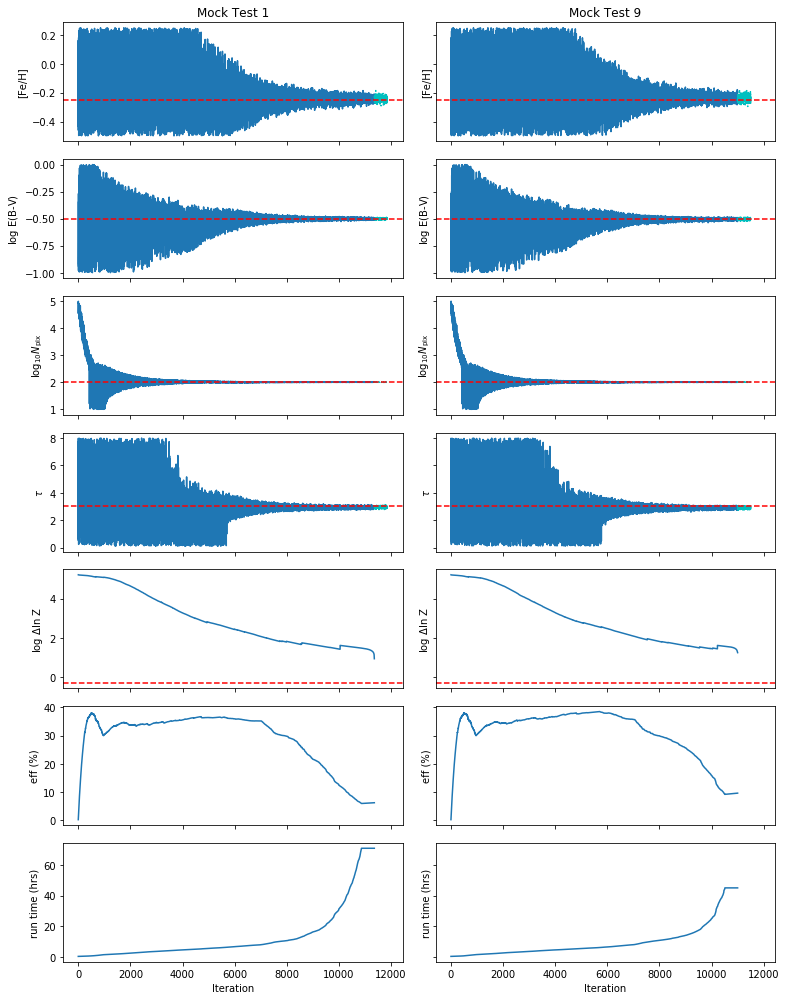

In [11]:
fig, axes = plot_sets(['mock_1', 'mock_9'], chains_only=False);

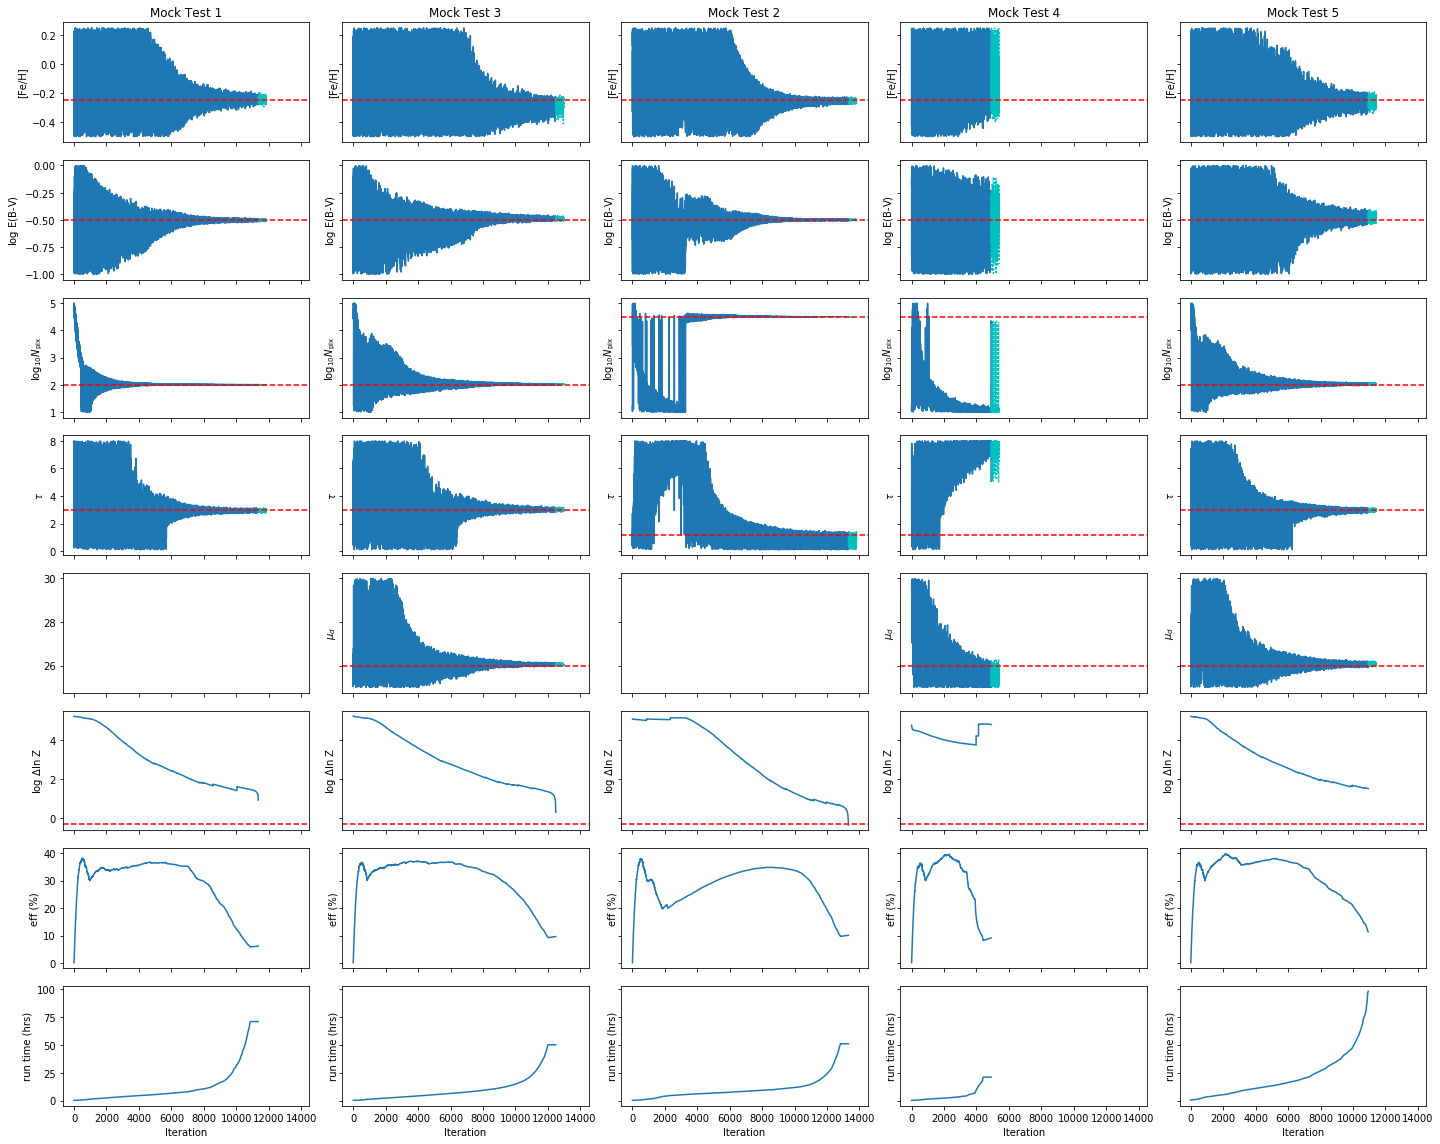

In [12]:
fig, axes = plot_sets(['mock_1', 'mock_3', 'mock_2', 'mock_4', 'mock_5'], chains_only=False);

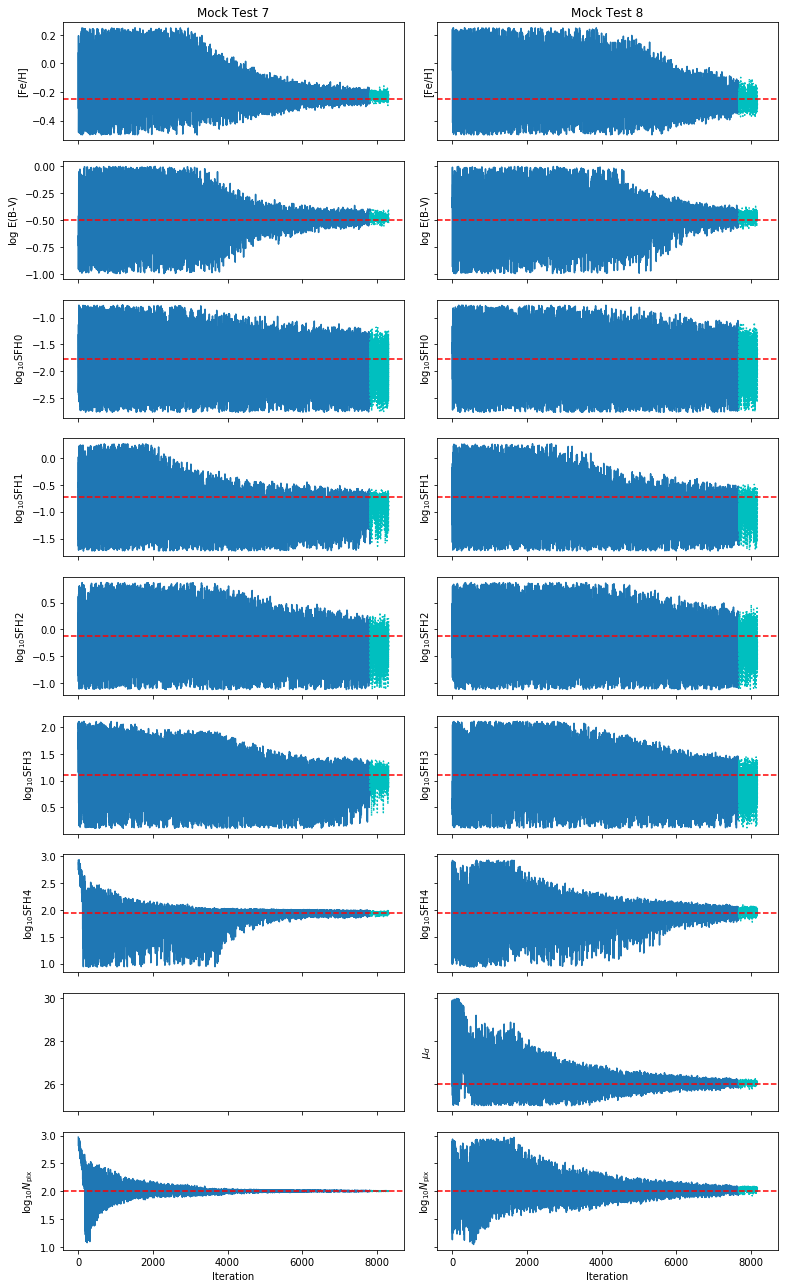

In [13]:
fig, axes = plot_sets(['mock_7', 'mock_8'], chains_only=True);

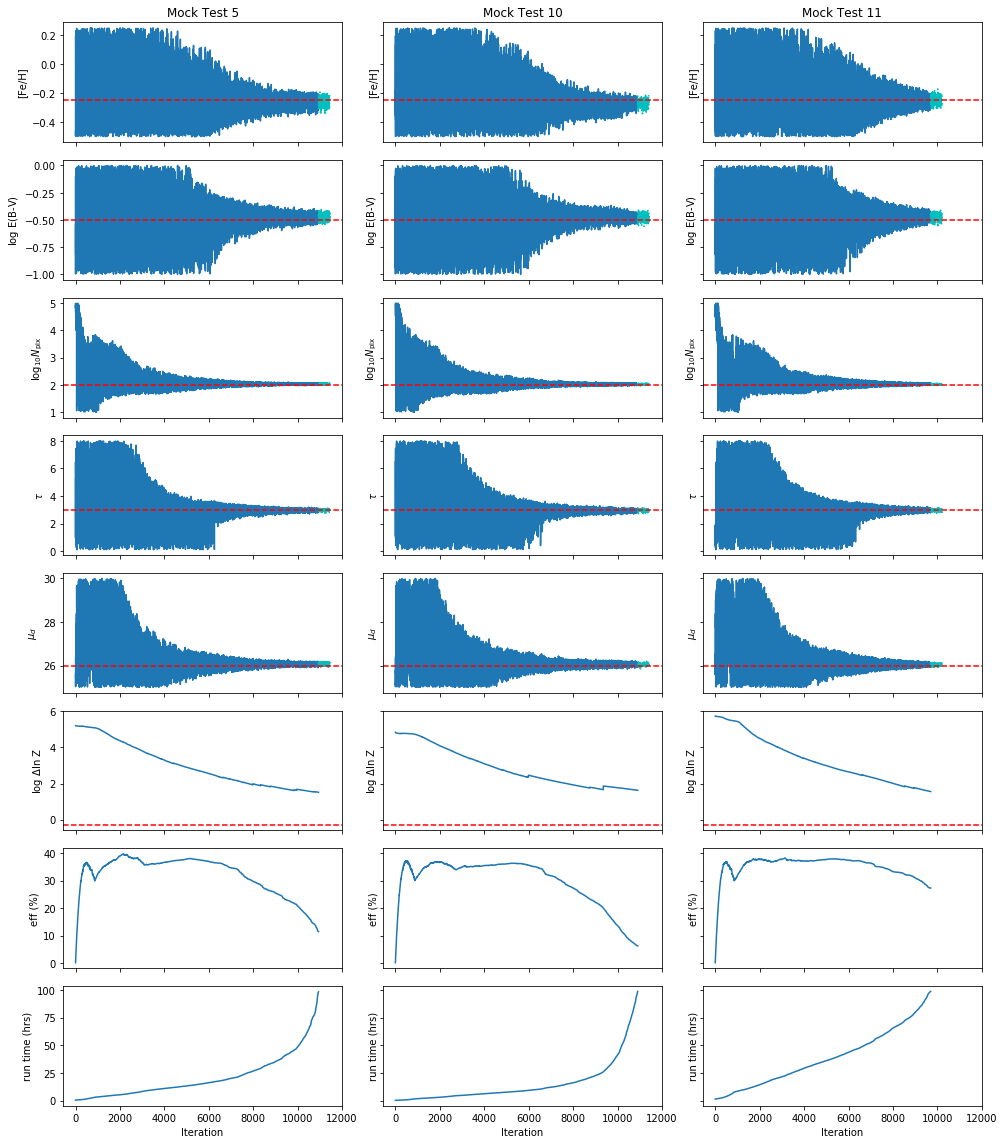

In [14]:
fig, axes = plot_sets(['mock_5', 'mock_10', 'mock_11'], chains_only=False);

KeyError: 'dmod'

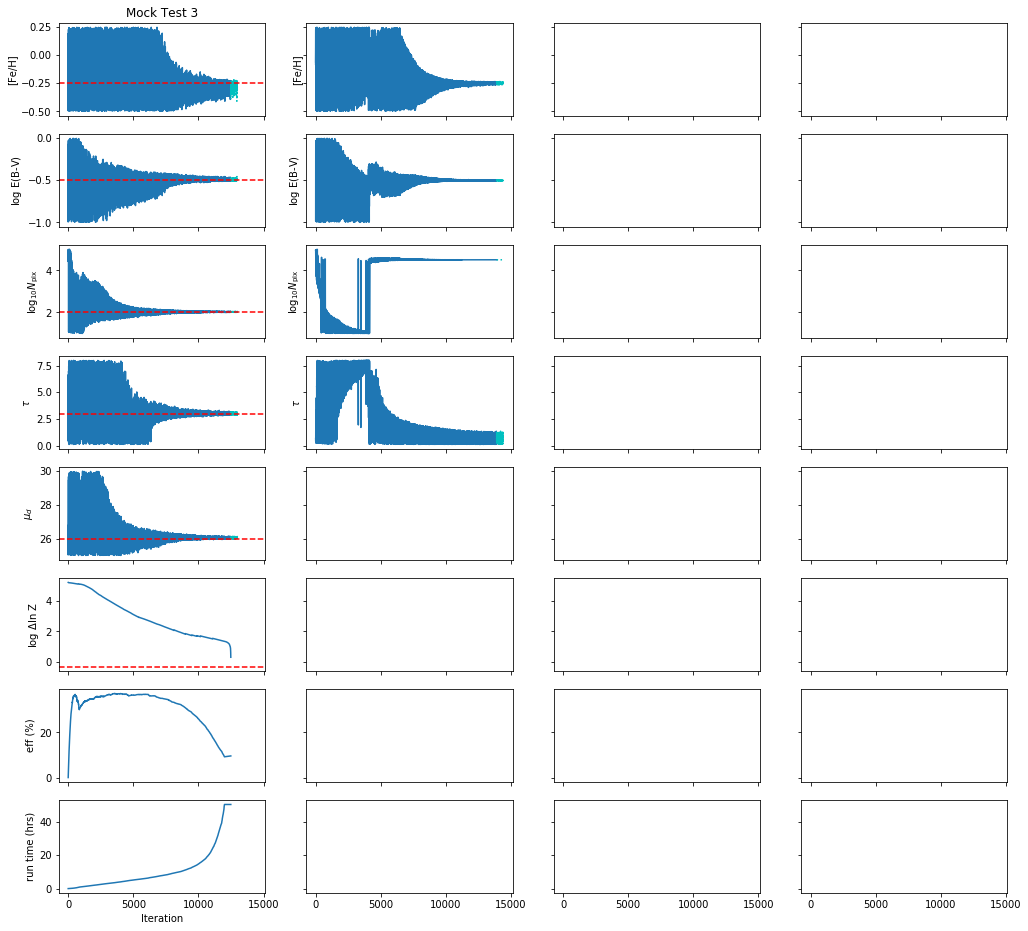

In [16]:
fig, axes = plot_sets(['mock_3', 'mock_12', 'mock_4', 'mock_13'], chains_only=False);

In [ ]:
fig, axes = plot_sets(['mock_3', 'mock_14', 'mock_4', 'mock_15'], chains_only=False);

In [ ]:
fig, axes = plot_sets(['mismatch_1', 'mismatch_2'], chains_only=True);

In [ ]:
fig, axes = plot_sets(['mismatch_3', 'mismatch_4', 'mismatch_5'], chains_only=True);

In [ ]:
fig, axes = plot_sets(['mismatch_6', 'mismatch_7', 'mismatch_8', 'mismatch_9'], chains_only=True);

In [ ]:
fig, axes = plot_sets(['mismatch_10', 'mismatch_11'], chains_only=True);

In [ ]:
def compare_model_to_truth(run_name, Nim=512, like_mode=2, bins=None):
    pcmd_true, _ = driv.simulate(models[run_name], Nim, fixed_seed=True)
    pcmd_model, _ = driv.simulate(res[run_name].best_model, Nim, fixed_seed=True)
    fig, axes = plt.subplots(ncols=3, figsize=(18, 5), sharex=True, sharey=True)
    _, bins, norm = ppy.plotting.plot_pcmd(pcmd_true, bins=bins, ax=axes[0])
    ppy.plotting.plot_pcmd_residual(pcmd_true, pcmd_model, like_mode=like_mode, bins=bins, ax=axes[1], title='Residual')
    ppy.plotting.plot_pcmd(pcmd_model, ax=axes[2], bins=bins, norm=norm)
    for a in axes:
        ppy.plotting.plot_isochrone(iso_model, axes=a, dmod=26.0, mag_system='vega')
    return pcmd_true, pcmd_model, bins, fig, axes 

In [ ]:
bins = [np.arange(15, 35, 0.05), np.arange(-1.5, 5.6, 0.05)]

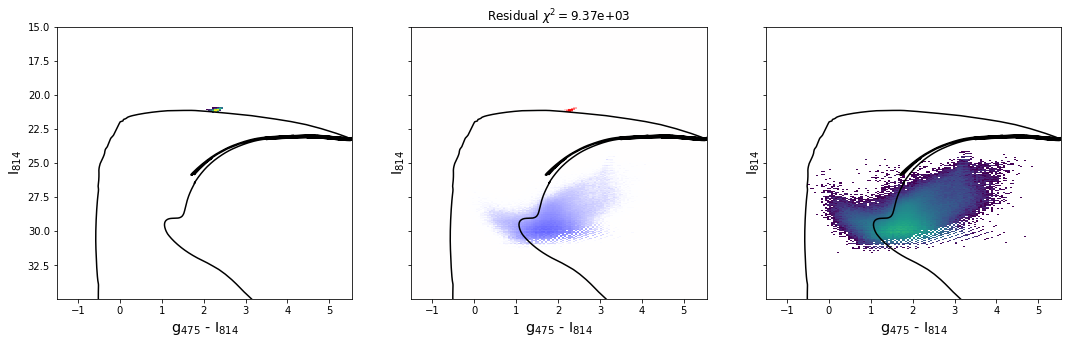

In [25]:
pcmd_true, pcmd_model, bins, fig, axes =  compare_model_to_truth('mock_2', bins=bins, Nim=1024, like_mode=2)

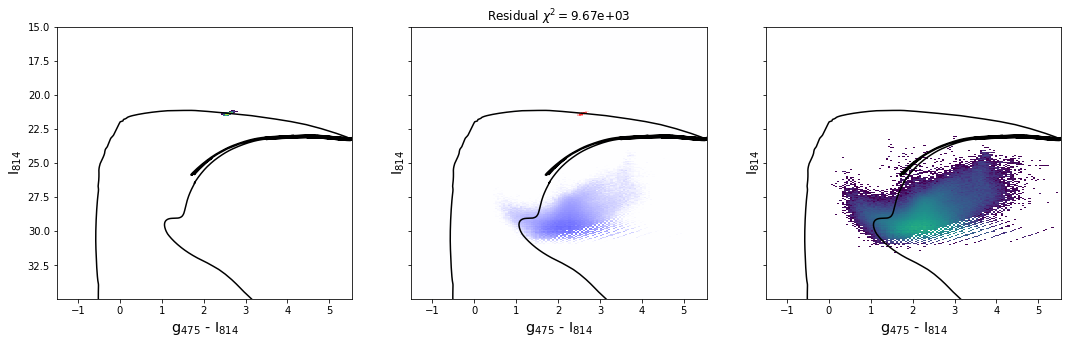

In [29]:
pcmd_true, pcmd_model, bins, fig, axes =  compare_model_to_truth('mock_4', bins=bins, Nim=1024, like_mode=2)

In [36]:
from scipy.stats import norm, poisson
def my_loglike(pcmd1, pcmd2, lm=2, err_min=0.1):
    a1, b1, c1 = ppy.utils.make_hess(pcmd1, bins, err_min=err_min)
    a2, b2, c2 = ppy.utils.make_hess(pcmd2, bins, err_min=err_min)
    hess_diff = (b2 - b1)
    combined_var = (c1**2 + c2**2)
    if lm == 1:
        b2[b2 == 0.] = 0.25 / pcmd2.shape[1]  # add 0.25 fake counts in each empty model bin
        loglike = poisson.logpmf(a1,
                                 mu=(b2 * pcmd1.shape[1]))
    elif lm == 2:  # Gaussian model (no variance term included)
        loglike = -1. * hess_diff**2 / (2.*combined_var)
    elif lm == 3:  # Gaussian model (variance included, downweights high-count bins)
        loglike = norm.logpdf(b2,
                              loc=b1,
                              scale=np.sqrt(combined_var))
    return loglike.sum()

In [40]:
my_loglike(pcmd_true, pcmd_model, lm=2, err_min=.1), my_loglike(pcmd_true, pcmd_true, lm=2, err_min=.1)

(-167487.71346500327, 0.0)

In [45]:
pcmd_true.shape[1]

1048576

In [46]:
np.sum(a1)

1048576.0

In [42]:
my_loglike(pcmd_true, pcmd_model, lm=3, err_min=.1), my_loglike(pcmd_true, pcmd_true, lm=3, err_min=.1)

(659085.890459905, 826989.1351495326)

In [41]:
my_loglike(pcmd_true, pcmd_model, lm=2, err_min=2.), my_loglike(pcmd_true, pcmd_true, lm=2, err_min=2.)

(-166029.98709213093, 0.0)

In [43]:
my_loglike(pcmd_true, pcmd_model, lm=3, err_min=2.), my_loglike(pcmd_true, pcmd_true, lm=3, err_min=2.)

(500928.6204073471, 667043.6525675188)

In [55]:
_, _, c1 = ppy.utils.make_hess(pcmd_true, bins, err_min=0.)
_, _, c2 = ppy.utils.make_hess(pcmd_true, bins, err_min=2.)

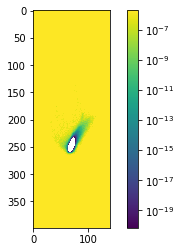

In [73]:
plt.imshow((c2-c1)[0], norm=mpl.colors.LogNorm())
plt.colorbar()

In [54]:
np.exp(-c1[0])

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [21]:
a2, b2, c2 = ppy.utils.make_hess(pcmd_true, bins, err_min=2.)

In [22]:
c1, c2

(array([[[9.53674316e-08, 9.53674316e-08, 9.53674316e-08, ...,
          9.53674316e-08, 9.53674316e-08, 9.53674316e-08],
         [9.53674316e-08, 9.53674316e-08, 9.53674316e-08, ...,
          9.53674316e-08, 9.53674316e-08, 9.53674316e-08],
         [9.53674316e-08, 9.53674316e-08, 9.53674316e-08, ...,
          9.53674316e-08, 9.53674316e-08, 9.53674316e-08],
         ...,
         [9.53674316e-08, 9.53674316e-08, 9.53674316e-08, ...,
          9.53674316e-08, 9.53674316e-08, 9.53674316e-08],
         [9.53674316e-08, 9.53674316e-08, 9.53674316e-08, ...,
          9.53674316e-08, 9.53674316e-08, 9.53674316e-08],
         [9.53674316e-08, 9.53674316e-08, 9.53674316e-08, ...,
          9.53674316e-08, 9.53674316e-08, 9.53674316e-08]]]),
 array([[[1.90734863e-06, 1.90734863e-06, 1.90734863e-06, ...,
          1.90734863e-06, 1.90734863e-06, 1.90734863e-06],
         [1.90734863e-06, 1.90734863e-06, 1.90734863e-06, ...,
          1.90734863e-06, 1.90734863e-06, 1.90734863e-06],
       

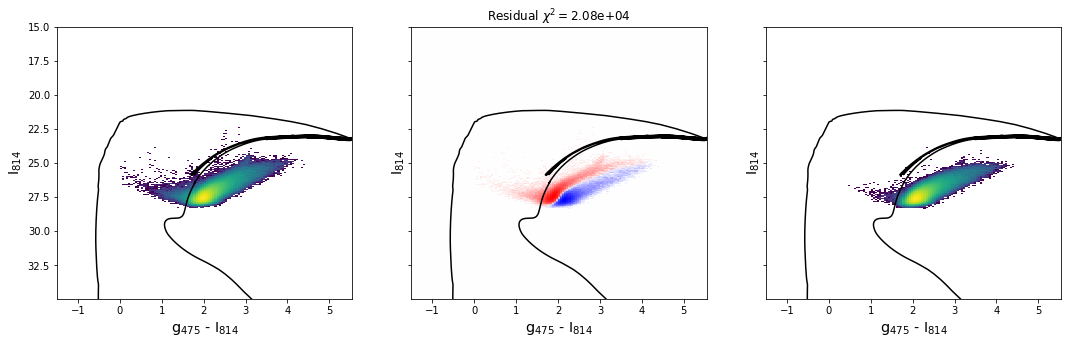

In [18]:
pcmd_true, pcmd_model, bins, fig, axes =  compare_model_to_truth('mock_1', bins=bins, Nim=1024, like_mode=3)

In [28]:
f[0].counts_to_mag(1e-3)

41.8029857125118

(array([ 1337.,  3600.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11447.]),
 array([30.997437, 33.82799 , 36.658546, 39.4891  , 42.319656, 45.15021 ,
        47.980766, 50.81132 , 53.641876, 56.47243 , 59.302986],
       dtype=float32),
 <a list of 10 Patch objects>)

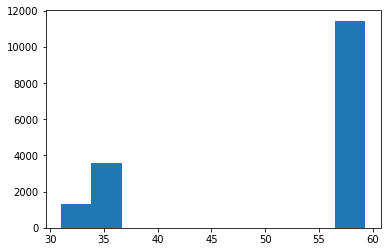

In [25]:
plt.hist(pcmd_model[0])

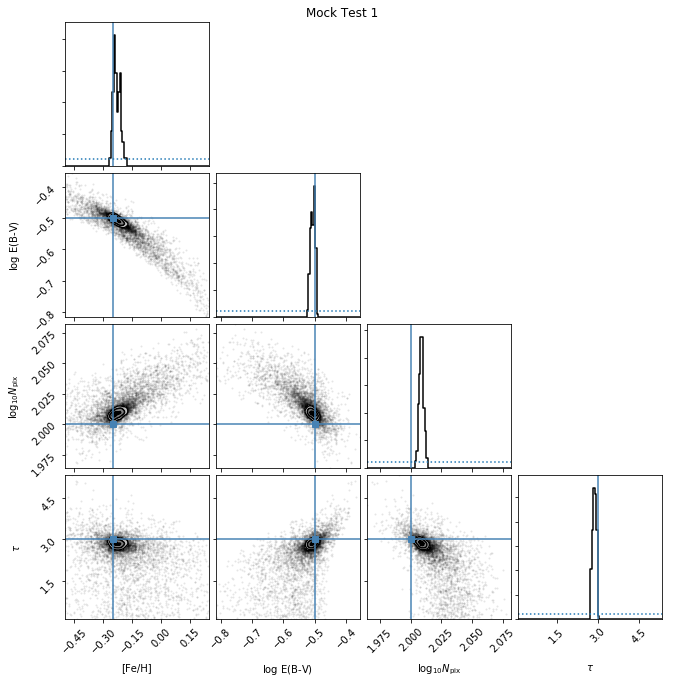

In [36]:
r = res['mock_1']
r.plot_corner(burn=4000, bins=100, weight=True, full_range=False);

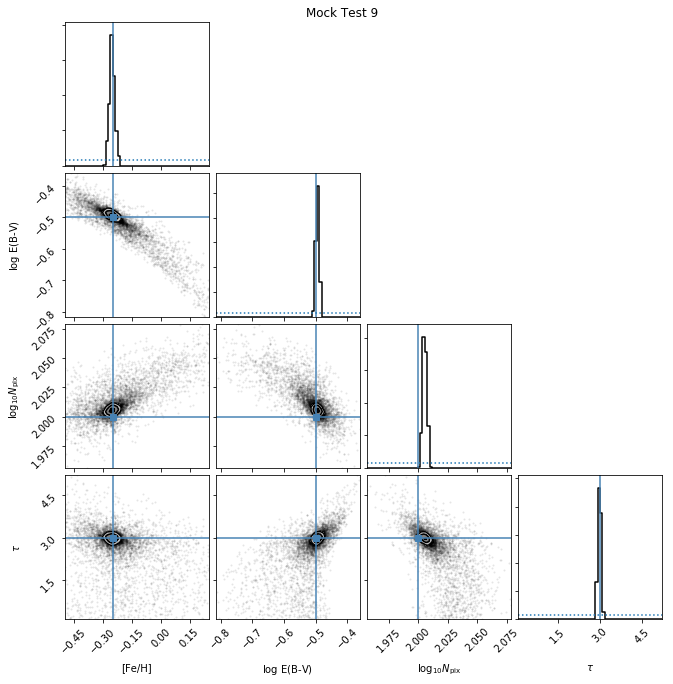

In [42]:
r = res['mock_9']
r.plot_corner(burn=4000, bins=60, weight=True, full_range=False);

In [50]:
pcmd_true

array([[22.117897 , 22.095848 , 22.157034 , ..., 22.09481  , 22.119596 ,
        22.15181  ],
       [ 3.4711094,  3.4685955,  3.4481773, ...,  3.488491 ,  3.4782028,
         3.4524956]], dtype=float32)

In [51]:
pcmd_model

array([[59.302986 , 59.302986 , 59.302986 , ..., 59.302986 , 59.302986 ,
        33.550407 ],
       [ 0.7448845,  0.7448845,  0.7448845, ...,  0.7448845,  0.7448845,
        26.497463 ]], dtype=float32)

In [13]:
driv.initialize_data(pcmd_true, bins=bins)

In [24]:
_, hess_model, err_model = ppy.utils.make_hess(pcmd_model, bins=bins)
combined_var = (driv.err_data**2. + err_model**2.)
# combined_var[(driv.hess_data + hess_model) <= 0.0] = 0.0

In [25]:
hess_diff = (hess_model - driv.hess_data)

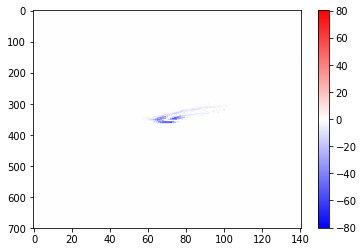

In [42]:
x = -np.abs((np.sign(hess_diff) * (hess_diff**2 / (2.*combined_var)))[0])
plt.imshow(x, aspect='auto', cmap='bwr', norm=mpl.colors.Normalize(vmin=-np.max(np.abs(x)), vmax=np.max(np.abs(x))))
plt.colorbar()

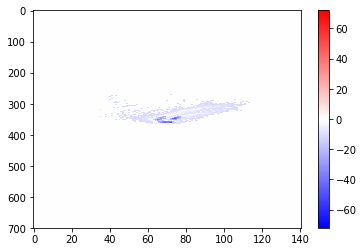

In [43]:
x = -np.abs((np.sign(hess_diff) * norm.logpdf(hess_model, loc=driv.hess_data, scale=np.sqrt(combined_var)))[0])
plt.imshow(x, aspect='auto', cmap='bwr', norm=mpl.colors.Normalize(vmin=-np.max(np.abs(x)), vmax=np.max(np.abs(x))))
plt.colorbar()

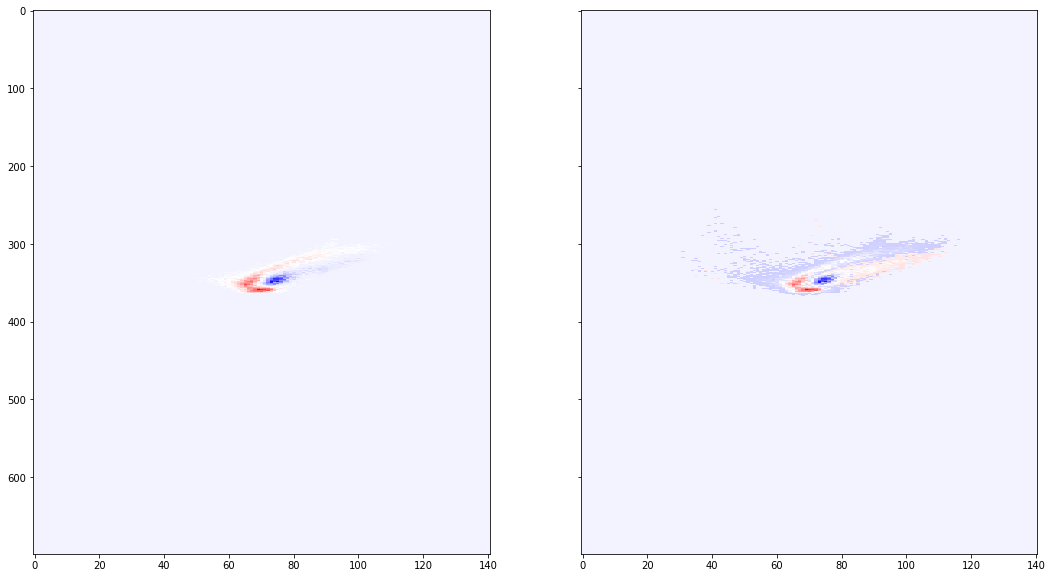

In [41]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(18, 10))
axes[0].imshow(driv.loglike_map(pcmd_model, like_mode=2, signed=True)[0], aspect='auto', cmap='bwr')
axes[1].imshow(driv.loglike_map(pcmd_model, like_mode=3, signed=True)[0], aspect='auto', cmap='bwr')


In [53]:
import pandas as pd

In [64]:
pn = ['nlive', 'niter', 'nc']

In [58]:
df = pd.DataFrame(columns=['nlive', 'niter', 'nc'], data=np.random.random((100, 3)))

In [65]:
df2 = df.drop(df.index, axis=0)

In [70]:
df2

,nlive,niter,nc


In [74]:
res['mock_1'].df

,nlive,niter,nc,eff,logl,logwt,logvol,logz,logzerr,h,delta_logz,time_elapsed,logfeh,logdust,logNpix,tau,log_weights,weights
0,2000.0,1.0,1.0,0.19960,-562950.0,-562960.0,-0.001998,-562960.0,0.11750,6.9098,inf,0.430417,-0.059021,-0.974850,4.9564,0.65912,-1.275000e+05,0.000000e+00
1,2000.0,2.0,1.0,0.39841,-561980.0,-561990.0,-0.003996,-561990.0,0.11751,6.9118,5.501400e+05,0.431278,-0.085755,-0.814270,4.9239,0.85790,-1.265300e+05,0.000000e+00
2,2000.0,3.0,1.0,0.59642,-561780.0,-561790.0,-0.005994,-561790.0,0.11753,6.9137,5.491600e+05,0.432139,0.163030,-0.432950,4.9779,1.51200,-1.263300e+05,0.000000e+00
3,2000.0,4.0,1.0,0.79365,-559860.0,-559870.0,-0.007992,-559870.0,0.11755,6.9157,5.489700e+05,0.433028,0.125760,-0.268620,4.8458,1.00590,-1.244100e+05,0.000000e+00
4,2000.0,5.0,1.0,0.99010,-559230.0,-559230.0,-0.009990,-559230.0,0.11757,6.9177,5.470400e+05,0.433889,-0.056626,-0.688500,4.6737,0.50014,-1.237800e+05,0.000000e+00
5,2000.0,6.0,1.0,1.18580,-558820.0,-558820.0,-0.011988,-558820.0,0.11758,6.9198,5.464100e+05,0.434750,-0.293040,-0.416940,4.7198,0.55263,-1.233700e+05,0.000000e+00
6,2000.0,7.0,1.0,1.38070,-558560.0,-558570.0,-0.013986,-558570.0,0.11760,6.9218,5.460000e+05,0.435583,0.226830,-0.250700,4.7309,0.79845,-1.231100e+05,0.000000e+00
7,2000.0,8.0,2.0,1.57170,-557950.0,-557960.0,-0.015984,-557960.0,0.11762,6.9238,5.457400e+05,0.437306,0.182450,-0.876700,4.5791,1.72000,-1.225000e+05,0.000000e+00
8,2000.0,9.0,1.0,1.76470,-557910.0,-557920.0,-0.017982,-557920.0,0.11763,6.9257,5.451300e+05,0.438167,0.111770,-0.907960,4.5512,0.22987,-1.224600e+05,0.000000e+00
9,2000.0,10.0,1.0,1.95690,-557880.0,-557890.0,-0.019980,-557890.0,0.11765,6.9277,5.450900e+05,0.439056,0.230540,-0.245780,4.6667,0.39785,-1.224300e+05,0.000000e+00
